<a href="https://colab.research.google.com/github/rajveer0104/Deep-Learning/blob/main/GPU_vs_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
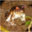

In [ ]:
X_train[0]

In [ ]:
Y_train[0:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot(index):
  plt.imshow(X_train[index])
  plt.show()

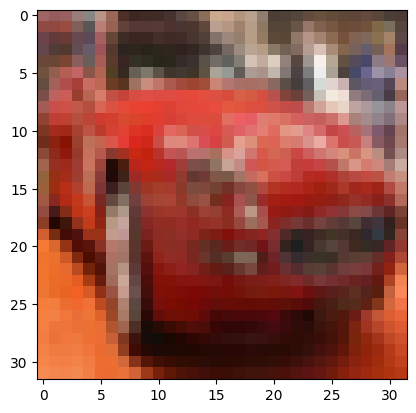

In [ ]:
plot(5)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
Y_train[3]

array([4], dtype=uint8)

In [ ]:
classes[Y_train[3][0]]

'deer'

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
Y_train_categorical = keras.utils.to_categorical(
    Y_train, num_classes=10
)

In [ ]:
Y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
Y_test_categorical = keras.utils.to_categorical(
    Y_test, num_classes=10
)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled,Y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2999 - loss: 1.9335
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4220 - loss: 1.6390
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4560 - loss: 1.5498
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4748 - loss: 1.4884
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4952 - loss: 1.4379
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5076 - loss: 1.3939
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5246 - loss: 1.3557
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5417 - loss: 1.3092
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5525 - loss: 1.2832
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5603 - loss: 1.2547
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5746 - loss: 1.2119
Epoch 12/50
1563/1563 ━━━━━━

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


'cat'

In [ ]:
classes[Y_test[0][0]]

'cat'

In [ ]:
classes[np.argmax(model.predict(X_test_scaled)[100])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'deer'

In [ ]:
classes[Y_test[100][0]]

'deer'

In [ ]:
model.evaluate(X_test_scaled,Y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5640 - loss: 1.5421


[1.5525697469711304, 0.5626000165939331]

In [ ]:
def get_model():
  model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

  ])
  model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
  return model


#Exercise

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

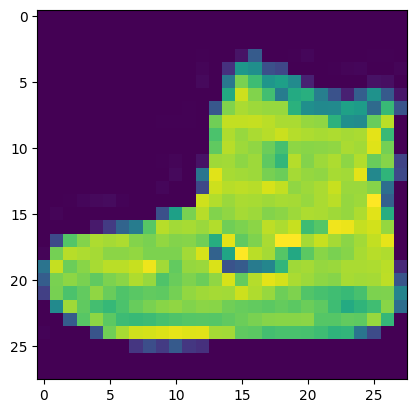

In [ ]:
plt.imshow(train_images[0])

In [ ]:

train_labels[0]

np.uint8(9)

In [ ]:
class_names[train_labels[0]]

'Ankle boot'

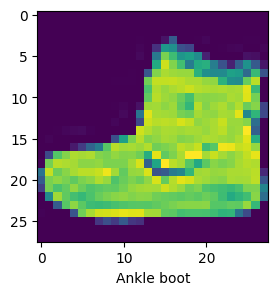

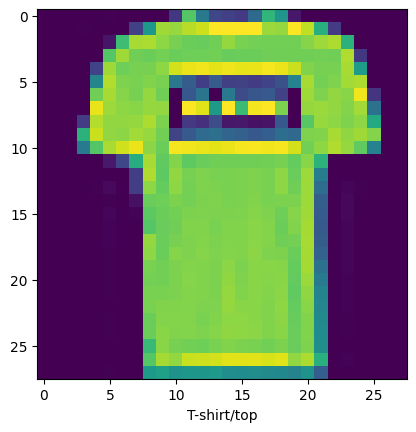

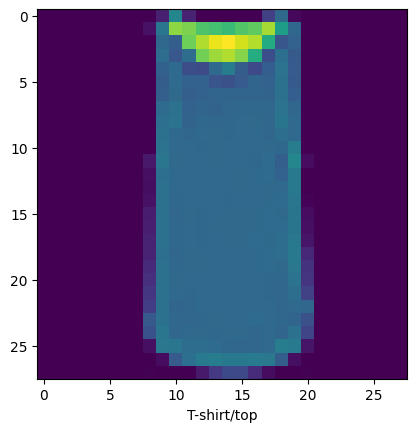

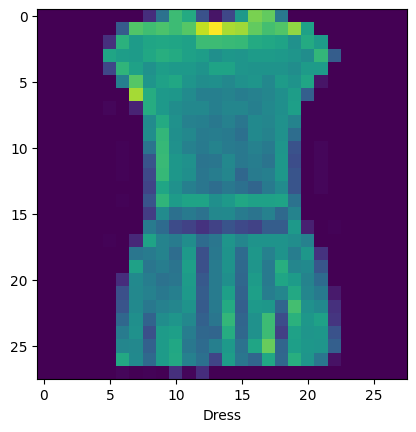

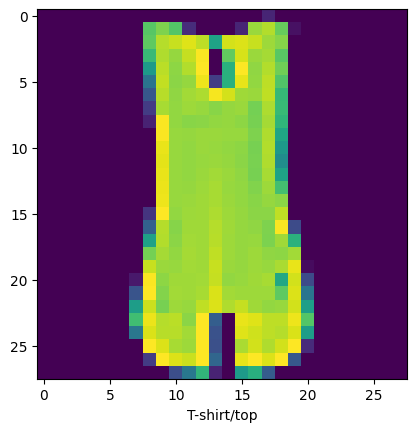

In [ ]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [ ]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [ ]:
def get_model(hidden_layers=1):
    layers = []

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7954 - loss: 0.5814
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8657 - loss: 0.3709
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8807 - loss: 0.3242
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8891 - loss: 0.2974
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9004 - loss: 0.2692


In [ ]:
model.predict(test_images_scaled)[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.1878370e-03, 9.9999952e-01, 1.4388858e-06, 8.9221291e-04,
       9.9847000e-04, 9.8409063e-13, 4.2628426e-06, 2.8120783e-23,
       6.3970771e-07, 8.7921532e-13], dtype=float32)

In [ ]:

test_labels[2]

np.uint8(1)

In [ ]:

tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_mod=get_model()
  cpu_mod.fit(train_images_scaled,train_labels,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7892 - loss: 0.5972
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8644 - loss: 0.3685
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8795 - loss: 0.3256
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8904 - loss: 0.2980
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8958 - loss: 0.2763
2min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_mod=get_model()
    gpu_mod.fit(train_images_scaled,train_labels,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7907 - loss: 0.5889
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8693 - loss: 0.3574
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8814 - loss: 0.3250
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8914 - loss: 0.2943
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8993 - loss: 0.2734
26.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
def get_model_1(hidden_layers=1):
    layers = []

    model1 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])

    model1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model1

In [ ]:
model1=get_model_1()
model1.fit(train_images_scaled, train_labels, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7122 - loss: 0.7883
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8464 - loss: 0.4367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8624 - loss: 0.3893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8697 - loss: 0.3705
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8834 - loss: 0.3220


In [ ]:
model1.predict(test_images_scaled)[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([4.1290470e-27, 4.4805180e-02, 0.0000000e+00, 6.6362455e-25,
       0.0000000e+00, 0.0000000e+00, 1.3252989e-32, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
test_labels[2]

np.uint8(1)

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_mod1=get_model_1()
  cpu_mod1.fit(train_images_scaled,train_labels,epochs=5)

Epoch 1/5
1675/1875 ━━━━━━━━━━━━━━━━━━━━ 1:03 317ms/step - accuracy: 0.7039 - loss: 0.8099

KeyboardInterrupt: 

In [ ]:


%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_mod_1=get_model_1()
    gpu_mod_1.fit(train_images_scaled,train_labels,epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7123 - loss: 0.7869
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8446 - loss: 0.4409
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8644 - loss: 0.3798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8752 - loss: 0.3463
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8779 - loss: 0.3311
1min 35s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
